In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#loading xgboost and catboost classifier libraries
!pip install xgboost
!pip install catboost
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
!pip install shap==0.40.0

In [6]:
import shap

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### DATASET

In [8]:
#Loading NPS dataset
df = pd.read_csv('Business_Case.csv')

In [9]:
df

,c_accountid,d_observation_date,c_entity,n_account_balance,d_acq_date,n_active_num,n_tel_notel,d_last_payment_date,n_pay_30,n_pay_60,...,n_in_dialler_obs_day,n_arrangement_active,d_inactivation_date,d_last_broken_date,c_subregion,gender,age,d_last_inbound_date,Target_Amount,Target
0,4169220,01/01/2022,Entity 1,4643.12,13/04/2018,2,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_59,M,31,NaN,3500.0,1
1,4169508,01/01/2022,Entity 1,4823.09,13/04/2018,4,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_28,M,28,NaN,0.0,0
2,4169571,01/01/2022,Entity 1,966.41,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,NaN,M,35,NaN,0.0,0
3,4180740,01/01/2022,Entity 1,496.58,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_5,M,31,NaN,0.0,0
4,4167348,01/01/2022,Entity 1,2609.66,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_25,M,30,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,4166998,01/01/2022,Entity 1,333.69,13/04/2018,2,1,NaN,0.0,0.0,...,1,0,NaN,28/12/2021,Subregion_42,K,37,NaN,0.0,0
3466,4168596,01/01/2022,Entity 1,2671.60,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_45,K,42,NaN,0.0,0
3467,4172502,01/01/2022,Entity 1,893.32,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_48,K,35,NaN,0.0,0
3468,4173955,01/01/2022,Entity 1,439.56,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_45,K,31,NaN,0.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   c_accountid                      3470 non-null   int64  
 1   d_observation_date               3470 non-null   object 
 2   c_entity                         3470 non-null   object 
 3   n_account_balance                3470 non-null   float64
 4   d_acq_date                       3470 non-null   object 
 5   n_active_num                     3470 non-null   int64  
 6   n_tel_notel                      3470 non-null   int64  
 7   d_last_payment_date              313 non-null    object 
 8   n_pay_30                         3470 non-null   float64
 9   n_pay_60                         3470 non-null   float64
 10  n_pay_90                         3470 non-null   float64
 11  n_pay_180                        3470 non-null   float64
 12  n_pay_count_30      

In [11]:
#dropping id columns, date columns, columns with a unique value of 1,  and columns with missing values greater than 50%
drop = ['c_accountid','d_observation_date','n_tel_notel', 'd_last_sms_date' , 'd_rpc_date','d_lawsuit_date', 'd_payment_order_date', 'd_title_day', 'd_execution_date', 'd_unsuccesfull_exe_date', 'd_maturity_date', 'n_in_dialler_obs_day', 'd_inactivation_date', 'd_last_broken_date']

In [12]:
df = df.drop(drop, axis=1)
df.head()

,c_entity,n_account_balance,d_acq_date,n_active_num,d_last_payment_date,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,...,n_sms_count,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,c_subregion,gender,age,d_last_inbound_date,Target_Amount,Target
0,Entity 1,4643.12,13/04/2018,2,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0,Subregion_59,M,31,NaN,3500.0,1
1,Entity 1,4823.09,13/04/2018,4,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0,Subregion_28,M,28,NaN,0.0,0
2,Entity 1,966.41,13/04/2018,1,NaN,0.0,0.0,0.0,0.0,0,...,4,0,0,0,NaN,M,35,NaN,0.0,0
3,Entity 1,496.58,13/04/2018,1,NaN,0.0,0.0,0.0,0.0,0,...,6,0,0,0,Subregion_5,M,31,NaN,0.0,0
4,Entity 1,2609.66,13/04/2018,1,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0,Subregion_25,M,30,NaN,0.0,0


In [13]:
#df.describe(include='all')
df.describe()

,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,n_pay_count_180,n_sms_count,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,age,Target_Amount,Target
count,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000
mean,14385.726939,1.965994,4.735905,24.211847,45.872648,104.091599,0.014121,0.077522,0.141787,0.318156,1.515274,0.004035,0.002017,0.071758,-688.678963,160.872666,0.200000
std,27643.229669,2.062443,58.580808,151.852152,265.206277,569.291480,0.118007,0.326652,0.540182,1.150877,2.617693,0.063399,0.050895,0.258124,2616.923267,973.097862,0.400058
min,13.170000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000
25%,1190.745000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000
50%,3824.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000
75%,15305.925000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000
max,342964.730000,42.000000,2000.000000,4000.000000,6000.000000,12000.000000,1.000000,3.000000,5.000000,8.000000,32.000000,1.000000,2.000000,1.000000,88.000000,21000.000000,1.000000


### Preprocessing

#### missing values

<AxesSubplot:>

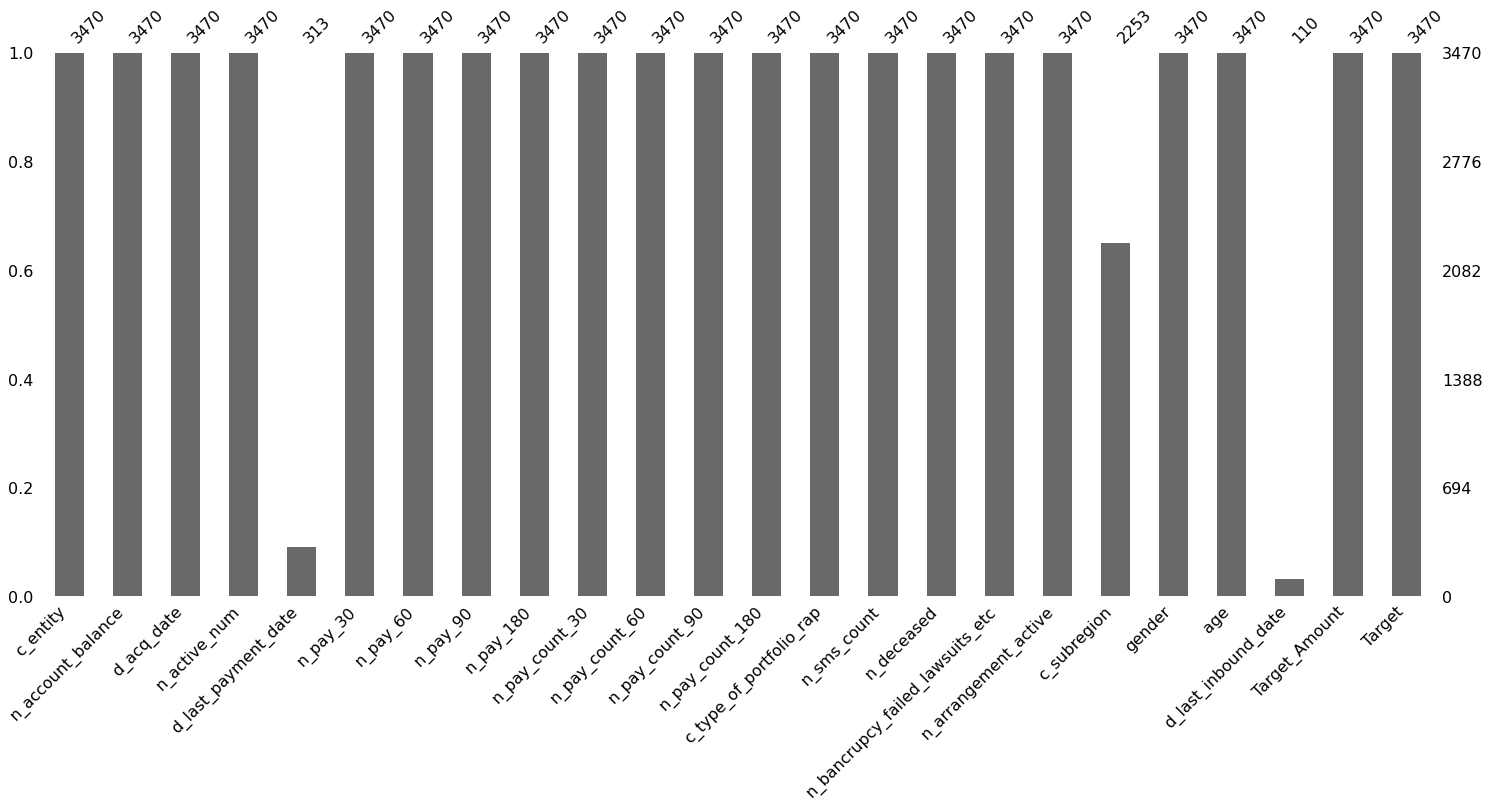

In [14]:
#plotting missing values
msno.bar(df)

#### UNIVARIATE ANALYSIS

#### categorical variables

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='gender', ylabel='count'>

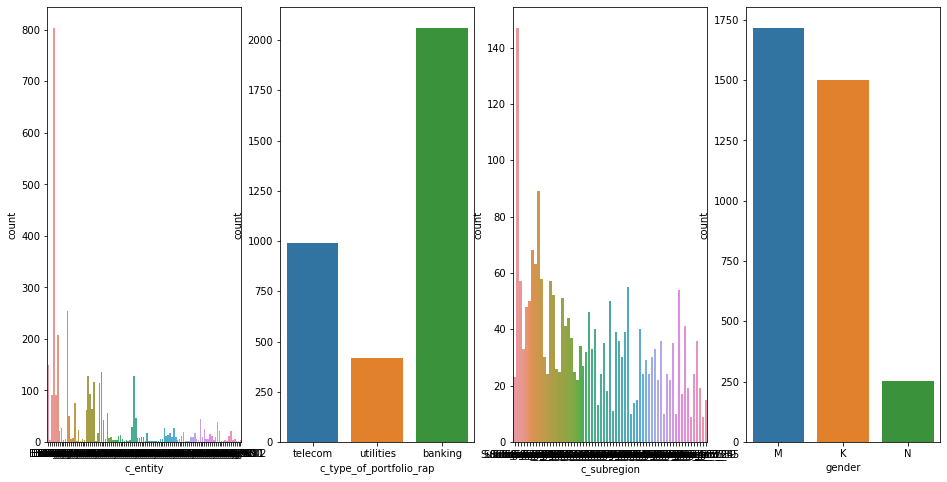

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(16,8))

sns.countplot(df['c_entity'], ax=ax[0])
sns.countplot(df['c_type_of_portfolio_rap'], ax=ax[1])
sns.countplot(df['c_subregion'], ax=ax[2])
sns.countplot(df['gender'], ax=ax[3])

#### 'NEW' binary variables

In [16]:
#creating a new feature of of payment date
df['d_last_payment_date'] = df['d_last_payment_date'].fillna(0)

In [17]:
df['payment_flag'] = [0 if x == 0 else 1 for x in df['d_last_payment_date']]

In [18]:
df['payment_flag'].value_counts()

0    3157
1     313
Name: payment_flag, dtype: int64

In [19]:
ct_pay_flag = pd.crosstab(df['payment_flag'], df
                 ['Target'],  normalize= True, margins=True, margins_name='Total')
ct_pay_flag

Target,0,1,Total
payment_flag,,,
0,0.79366,0.116138,0.909798
1,0.00634,0.083862,0.090202
Total,0.80000,0.200000,1.000000


In [20]:
#creating a 'others' category for nan in the subregion variable
df['c_subregion'] = df['c_subregion'].fillna('Others')

In [21]:
#creating a new variable out of inbound date variable
df['d_last_inbound_date'] = df['d_last_inbound_date'].fillna(0)

In [22]:
df['inbound_flag'] = [0 if x == 0 else 1 for x in df['d_last_inbound_date']]

In [23]:
df['inbound_flag'].value_counts()

0    3360
1     110
Name: inbound_flag, dtype: int64

In [24]:
ct_inbound_flag = pd.crosstab(df['inbound_flag'], df
                 ['Target'],  normalize= True, margins=True, margins_name='Total')
ct_inbound_flag

Target,0,1,Total
inbound_flag,,,
0,0.781268,0.187032,0.9683
1,0.018732,0.012968,0.0317
Total,0.800000,0.200000,1.0000


#### numeric variables

In [25]:
# identifying numeric variables 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num

,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,n_pay_count_180,n_sms_count,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,age,Target_Amount,Target,payment_flag,inbound_flag
0,4643.12,2,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,31,3500.0,1,0,0
1,4823.09,4,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,28,0.0,0,0,0
2,966.41,1,0.0,0.0,0.0,0.0,0,0,0,0,4,0,0,0,35,0.0,0,0,0
3,496.58,1,0.0,0.0,0.0,0.0,0,0,0,0,6,0,0,0,31,0.0,0,0,0
4,2609.66,1,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,30,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,333.69,2,0.0,0.0,0.0,0.0,0,0,0,0,2,0,0,0,37,0.0,0,0,0
3466,2671.60,1,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,42,0.0,0,0,0
3467,893.32,1,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,35,0.0,0,0,0
3468,439.56,1,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,31,0.0,0,0,0


In [26]:
df_num.describe()

,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,n_pay_count_180,n_sms_count,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,age,Target_Amount,Target,payment_flag,inbound_flag
count,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000
mean,14385.726939,1.965994,4.735905,24.211847,45.872648,104.091599,0.014121,0.077522,0.141787,0.318156,1.515274,0.004035,0.002017,0.071758,-688.678963,160.872666,0.200000,0.090202,0.031700
std,27643.229669,2.062443,58.580808,151.852152,265.206277,569.291480,0.118007,0.326652,0.540182,1.150877,2.617693,0.063399,0.050895,0.258124,2616.923267,973.097862,0.400058,0.286512,0.175226
min,13.170000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000,0.000000,0.000000
25%,1190.745000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000
50%,3824.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000
75%,15305.925000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,342964.730000,42.000000,2000.000000,4000.000000,6000.000000,12000.000000,1.000000,3.000000,5.000000,8.000000,32.000000,1.000000,2.000000,1.000000,88.000000,21000.000000,1.000000,1.000000,1.000000


In [27]:
df['age'] = df['age'].replace([-9999], 0)

In [28]:
df['age'].value_counts()

0     254
42    113
39    104
38    101
41     99
     ... 
83      3
85      2
22      1
80      1
88      1
Name: age, Length: 65, dtype: int64

In [29]:
#converting the age variable into categorical: age bands
def AgeBands(df):    
    if (df['age'] == 0):
        return 'n/a'
    elif (df['age'] in (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38)):
        return '22-38'
    elif (df['age'] in (39,40,41,42,43,44,45,46,47,48)):
        return '39-48'
    elif (df['age'] in (49,50,51,52,53,54,55,56,57,58)):
        return '49-58'
    elif (df['age'] in (59,60,61,62,63,64,65,66,67,68)):
        return '59-68'
    elif (df['age'] in (69,70,71,72,73,74,75,76,77,78)):
        return '69-78'
    elif (df['age'] in (79,80,81,82,83,84,85,86,87,88)):
        return '79-88'

In [30]:
df['age_bands'] = df.apply(AgeBands, axis = 1)

In [31]:
df['age_bands'].value_counts()

22-38    971
39-48    934
49-58    662
59-68    456
n/a      254
69-78    160
79-88     33
Name: age_bands, dtype: int64

#### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Target'>

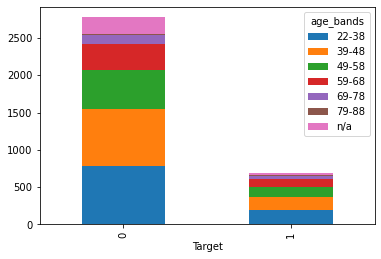

In [32]:
df_plot = df.groupby(['age_bands', 'Target']).size().reset_index().pivot(columns='age_bands', index='Target', values=0)
df_plot.plot(kind='bar', stacked=True)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='n_sms_count', ylabel='count'>

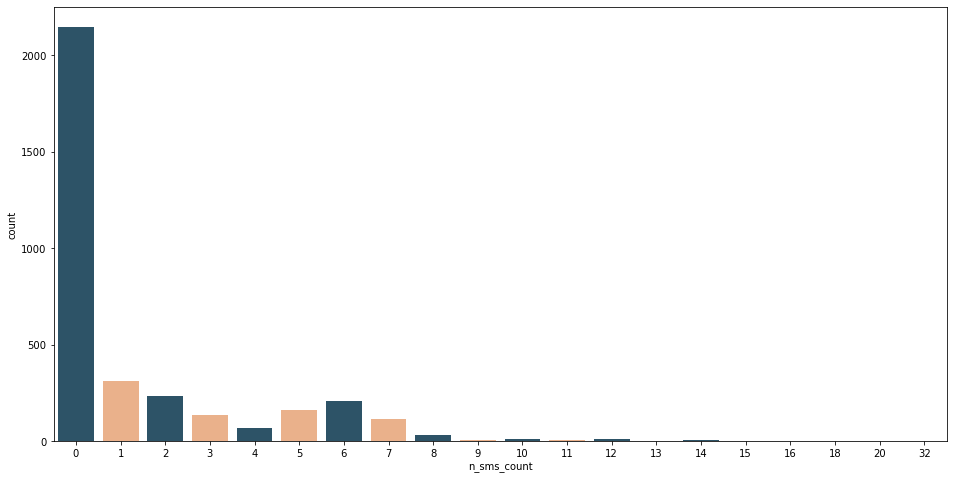

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))

sns.countplot(df['n_sms_count'], palette=['#235671',"#FAAE7B"])

<AxesSubplot:xlabel='Target'>

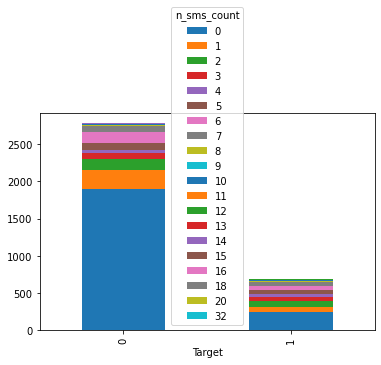

In [34]:
df_plot = df.groupby(['n_sms_count', 'Target']).size().reset_index().pivot(columns='n_sms_count', index='Target', values=0)
df_plot.plot(kind='bar', stacked=True)

In [35]:
df['n_sms_count'].value_counts(normalize=True)

0     0.617867
1     0.090490
2     0.068012
6     0.059654
5     0.046398
3     0.038905
7     0.033718
4     0.020173
8     0.009222
10    0.004035
12    0.004035
14    0.001729
11    0.001441
9     0.001441
13    0.000865
15    0.000576
18    0.000576
32    0.000288
16    0.000288
20    0.000288
Name: n_sms_count, dtype: float64

In [36]:
df['sms_flag'] = [0 if x == 0 else 1 for x in df['n_sms_count']]

In [37]:
df['sms_flag'].value_counts()

0    2144
1    1326
Name: sms_flag, dtype: int64

<AxesSubplot:xlabel='Target'>

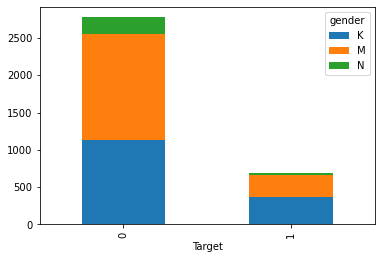

In [38]:
df_plot = df.groupby(['gender', 'Target']).size().reset_index().pivot(columns='gender', index='Target', values=0)
df_plot.plot(kind='bar', stacked=True)

In [39]:
ct_gender = pd.crosstab(df['gender'], df
                 ['Target'],  normalize = 'columns', margins=True, margins_name='Total')
ct_gender

Target,0,1,Total
gender,,,
K,0.40598,0.536023,0.431988
M,0.51585,0.410663,0.494813
N,0.07817,0.053314,0.073199


<AxesSubplot:xlabel='Target'>

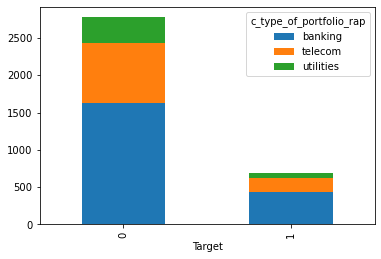

In [40]:
df_plot = df.groupby(['c_type_of_portfolio_rap', 'Target']).size().reset_index().pivot(columns='c_type_of_portfolio_rap', index='Target', values=0)
df_plot.plot(kind='bar', stacked=True)

In [41]:
ct_portafolio = pd.crosstab(df['c_type_of_portfolio_rap'], df
                 ['Target'],  normalize = 'columns', margins=True, margins_name='Total')
ct_portafolio

Target,0,1,Total
c_type_of_portfolio_rap,,,
banking,0.584294,0.632565,0.593948
telecom,0.291066,0.265130,0.285879
utilities,0.124640,0.102305,0.120173


In [42]:
#generating a loop to plot numeric variables 
columns = df_num.columns
columns = list(columns)
columns

['n_account_balance',
 'n_active_num',
 'n_pay_30',
 'n_pay_60',
 'n_pay_90',
 'n_pay_180',
 'n_pay_count_30',
 'n_pay_count_60',
 'n_pay_count_90',
 'n_pay_count_180',
 'n_sms_count',
 'n_deceased',
 'n_bancrupcy_failed_lawsuits_etc',
 'n_arrangement_active',
 'age',
 'Target_Amount',
 'Target',
 'payment_flag',
 'inbound_flag']

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

<Figure size 432x288 with 0 Axes>

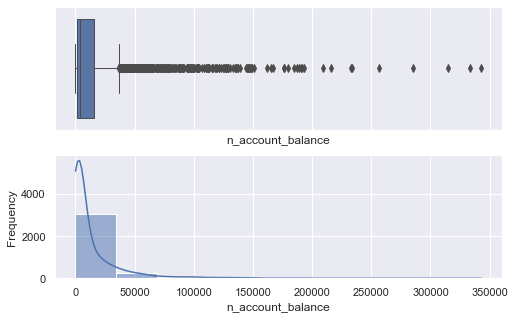

<Figure size 576x360 with 0 Axes>

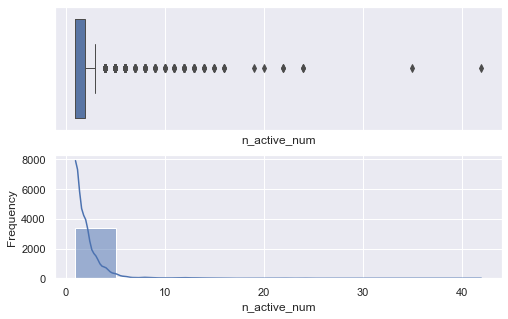

<Figure size 576x360 with 0 Axes>

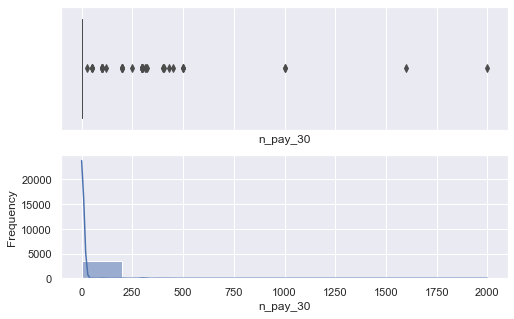

<Figure size 576x360 with 0 Axes>

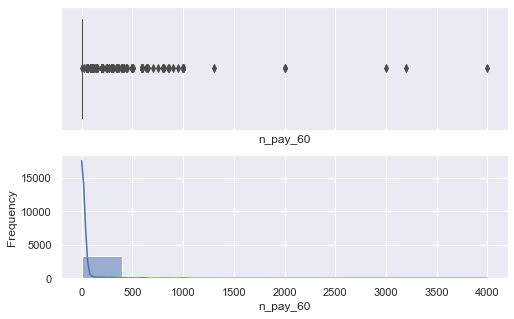

<Figure size 576x360 with 0 Axes>

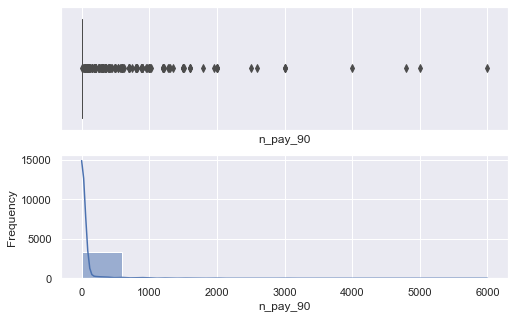

<Figure size 576x360 with 0 Axes>

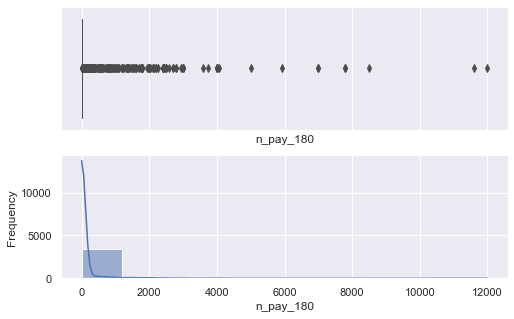

<Figure size 576x360 with 0 Axes>

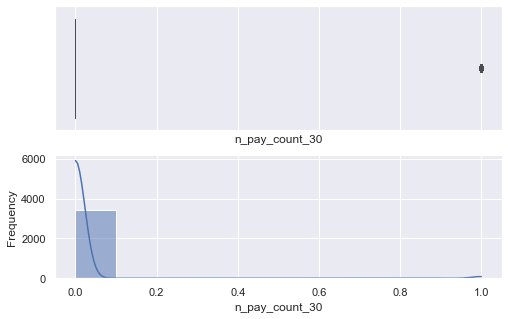

<Figure size 576x360 with 0 Axes>

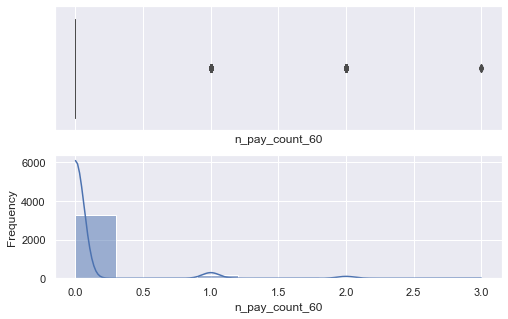

<Figure size 576x360 with 0 Axes>

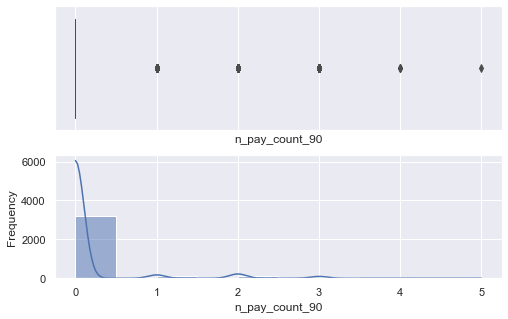

<Figure size 576x360 with 0 Axes>

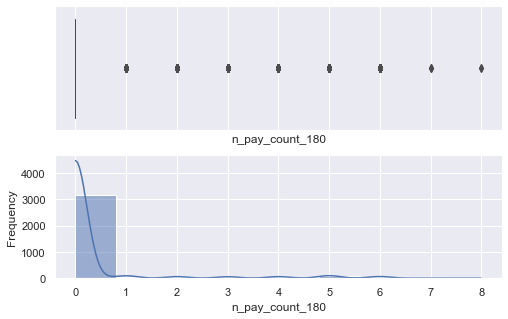

<Figure size 576x360 with 0 Axes>

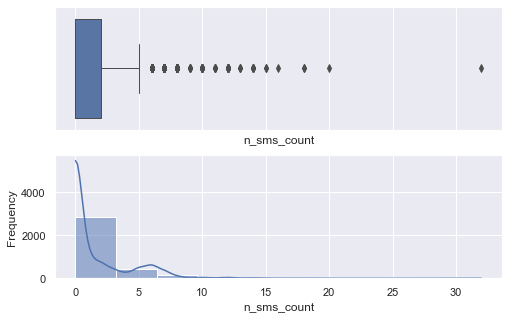

<Figure size 576x360 with 0 Axes>

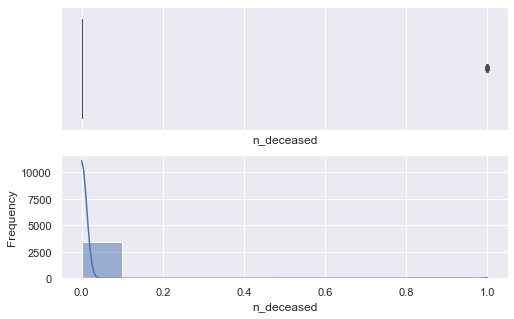

<Figure size 576x360 with 0 Axes>

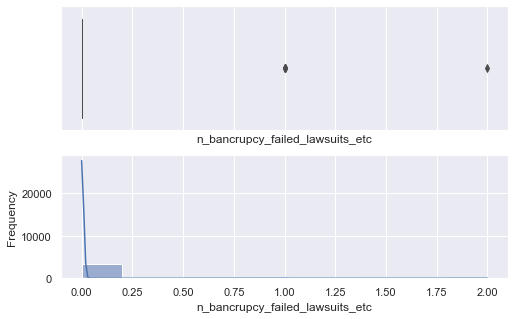

<Figure size 576x360 with 0 Axes>

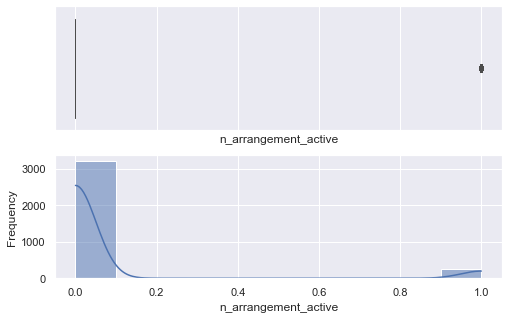

<Figure size 576x360 with 0 Axes>

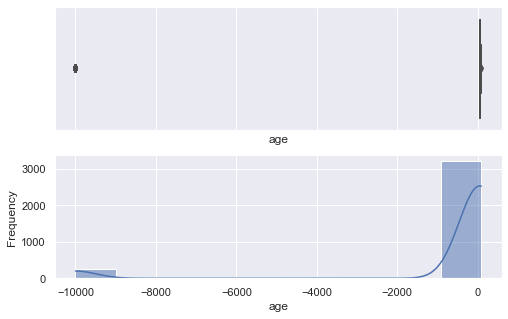

<Figure size 576x360 with 0 Axes>

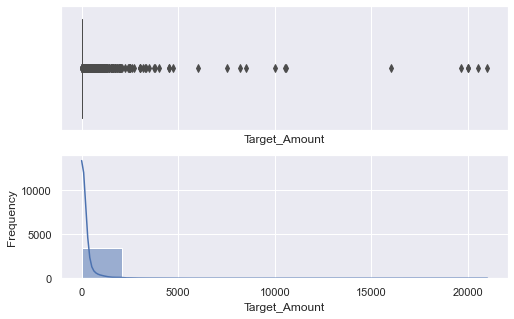

<Figure size 576x360 with 0 Axes>

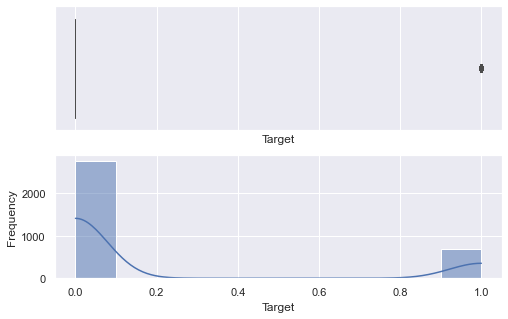

<Figure size 576x360 with 0 Axes>

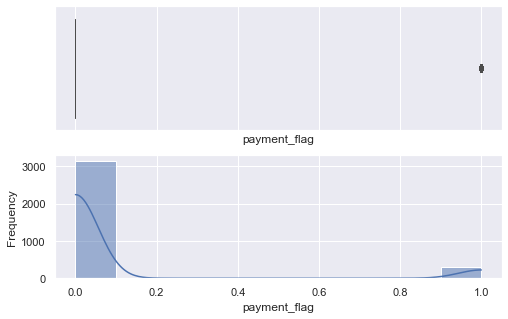

<Figure size 576x360 with 0 Axes>

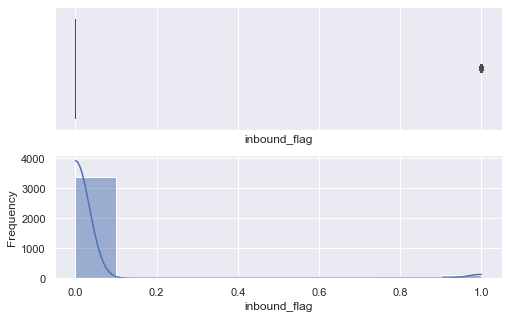

In [43]:
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_num[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df_num[i], ax=ax_hist , bins = 10,kde=True)

#### The TARGET variable

In [44]:
df['Target'].value_counts(normalize=True).sort_values()

1    0.2
0    0.8
Name: Target, dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   c_entity                         3470 non-null   object 
 1   n_account_balance                3470 non-null   float64
 2   d_acq_date                       3470 non-null   object 
 3   n_active_num                     3470 non-null   int64  
 4   d_last_payment_date              3470 non-null   object 
 5   n_pay_30                         3470 non-null   float64
 6   n_pay_60                         3470 non-null   float64
 7   n_pay_90                         3470 non-null   float64
 8   n_pay_180                        3470 non-null   float64
 9   n_pay_count_30                   3470 non-null   int64  
 10  n_pay_count_60                   3470 non-null   int64  
 11  n_pay_count_90                   3470 non-null   int64  
 12  n_pay_count_180     

In [46]:
drop2 = ['d_acq_date', 'd_last_payment_date', 'age', 'd_last_inbound_date']

df = df.drop(drop2, axis=1)
df.head()

,c_entity,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,...,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,c_subregion,gender,Target_Amount,Target,payment_flag,inbound_flag,age_bands,sms_flag
0,Entity 1,4643.12,2,0.0,0.0,0.0,0.0,0,0,0,...,0,0,Subregion_59,M,3500.0,1,0,0,22-38,0
1,Entity 1,4823.09,4,0.0,0.0,0.0,0.0,0,0,0,...,0,0,Subregion_28,M,0.0,0,0,0,22-38,0
2,Entity 1,966.41,1,0.0,0.0,0.0,0.0,0,0,0,...,0,0,Others,M,0.0,0,0,0,22-38,1
3,Entity 1,496.58,1,0.0,0.0,0.0,0.0,0,0,0,...,0,0,Subregion_5,M,0.0,0,0,0,22-38,1
4,Entity 1,2609.66,1,0.0,0.0,0.0,0.0,0,0,0,...,0,0,Subregion_25,M,0.0,0,0,0,22-38,0


In [47]:
df.to_csv('variables_to_calculate_IV.csv', index=False)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   c_entity                         3470 non-null   object 
 1   n_account_balance                3470 non-null   float64
 2   n_active_num                     3470 non-null   int64  
 3   n_pay_30                         3470 non-null   float64
 4   n_pay_60                         3470 non-null   float64
 5   n_pay_90                         3470 non-null   float64
 6   n_pay_180                        3470 non-null   float64
 7   n_pay_count_30                   3470 non-null   int64  
 8   n_pay_count_60                   3470 non-null   int64  
 9   n_pay_count_90                   3470 non-null   int64  
 10  n_pay_count_180                  3470 non-null   int64  
 11  c_type_of_portfolio_rap          3470 non-null   object 
 12  n_sms_count         

#### Correlation among variables - Dealing with Redundant Variables

In [49]:
corrMatrix = df.corr()
#print (corrMatrix)
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,n_pay_count_180,n_sms_count,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,Target_Amount,Target,payment_flag,inbound_flag,sms_flag
n_account_balance,1.00,0.09,0.00,0.03,0.03,0.04,-0.01,0.01,0.01,0.01,-0.10,0.01,0.02,0.04,0.01,-0.06,0.01,0.02,-0.13
n_active_num,0.09,1.00,0.01,0.03,0.03,0.03,0.00,0.01,0.01,0.01,-0.04,0.02,-0.00,0.05,0.00,-0.00,0.00,0.09,-0.06
n_pay_30,0.00,0.01,1.00,0.76,0.67,0.58,0.68,0.47,0.43,0.37,0.02,-0.01,-0.00,0.21,0.08,0.16,0.26,0.03,0.08
n_pay_60,0.03,0.03,0.76,1.00,0.91,0.84,0.51,0.68,0.66,0.61,0.06,-0.01,-0.01,0.36,0.16,0.31,0.51,0.05,0.13
n_pay_90,0.03,0.03,0.67,0.91,1.00,0.91,0.44,0.62,0.69,0.64,0.06,-0.01,-0.01,0.38,0.19,0.34,0.55,0.07,0.13
n_pay_180,0.04,0.03,0.58,0.84,0.91,1.00,0.37,0.60,0.66,0.67,0.06,-0.01,-0.01,0.37,0.18,0.35,0.58,0.06,0.14
n_pay_count_30,-0.01,0.00,0.68,0.51,0.44,0.37,1.00,0.69,0.61,0.53,0.03,-0.01,-0.00,0.32,0.05,0.24,0.38,0.05,0.11
n_pay_count_60,0.01,0.01,0.47,0.68,0.62,0.60,0.69,1.00,0.93,0.88,0.10,-0.02,-0.01,0.50,0.11,0.46,0.75,0.08,0.18
n_pay_count_90,0.01,0.01,0.43,0.66,0.69,0.66,0.61,0.93,1.00,0.94,0.11,-0.02,-0.01,0.53,0.13,0.50,0.83,0.09,0.19
n_pay_count_180,0.01,0.01,0.37,0.61,0.64,0.67,0.53,0.88,0.94,1.00,0.12,-0.02,-0.01,0.53,0.13,0.52,0.88,0.07,0.20


#### Variable Clustering

In [50]:
!pip install varclushi
from varclushi import VarClusHi

In [51]:
clust_model = VarClusHi(df_num, maxeigval2 = 0.7, maxclus = None)
clust_model.varclus()

In [52]:
clust_model.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,6,4.315650,0.672623,0.719275
1,1,4,3.350337,0.472101,0.837584
2,2,1,1.000000,0.000000,1.000000
3,3,1,1.000000,0.000000,1.000000
4,4,1,1.000000,0.000000,1.000000
5,5,1,1.000000,0.000000,1.000000
6,6,1,1.000000,0.000000,1.000000
7,7,1,1.000000,0.000000,1.000000
8,8,1,1.000000,0.000000,1.000000
9,9,1,1.000000,0.000000,1.000000


In [53]:
clust_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,n_pay_count_90,0.915897,0.445955,1.517982e-01
1,0,n_pay_count_180,0.919418,0.397897,1.338350e-01
2,0,n_arrangement_active,0.404708,0.132447,6.861743e-01
3,0,payment_flag,0.815626,0.274967,2.542979e-01
4,0,Target,0.418648,0.109354,6.527313e-01
5,0,n_pay_count_60,0.841355,0.475425,3.024262e-01
6,1,n_pay_30,0.656721,0.456433,6.315303e-01
7,1,n_pay_60,0.930148,0.396375,1.157214e-01
8,1,n_pay_90,0.922467,0.419052,1.334598e-01
9,1,n_pay_180,0.841001,0.420675,2.744556e-01


In [54]:
df_model = df[['age_bands','c_type_of_portfolio_rap','gender','n_account_balance','n_active_num', 'n_pay_count_90','n_sms_count', 'n_deceased','n_arrangement_active','inbound_flag','Target']]
df_model

,age_bands,c_type_of_portfolio_rap,gender,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,Target
0,22-38,telecom,M,4643.12,2,0,0,0,0,0,1
1,22-38,telecom,M,4823.09,4,0,0,0,0,0,0
2,22-38,telecom,M,966.41,1,0,4,0,0,0,0
3,22-38,telecom,M,496.58,1,0,6,0,0,0,0
4,22-38,telecom,M,2609.66,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3465,22-38,telecom,K,333.69,2,0,2,0,0,0,0
3466,39-48,telecom,K,2671.60,1,0,1,0,0,0,0
3467,22-38,telecom,K,893.32,1,0,0,0,0,0,0
3468,22-38,telecom,K,439.56,1,0,0,0,0,0,0


### MODEL

In [55]:
# storing features and target in separate variables
label = df_model['Target']
features = df_model.drop('Target', axis=1)

#### OneHot Encoding categorical variables

In [56]:
onehotencoder = OneHotEncoder()

In [57]:
# Create a boolean mask for categorical columns
categorical_mask = features.dtypes == object
categorical_mask

age_bands                   True
c_type_of_portfolio_rap     True
gender                      True
n_account_balance          False
n_active_num               False
n_pay_count_90             False
n_sms_count                False
n_deceased                 False
n_arrangement_active       False
inbound_flag               False
dtype: bool

In [58]:
# Get list of categorical column names
categorical_columns = features.columns[categorical_mask].tolist()
categorical_columns

['age_bands', 'c_type_of_portfolio_rap', 'gender']

In [59]:
# Print the head of the categorical columns
print(features[categorical_columns].head())

  age_bands c_type_of_portfolio_rap gender
0     22-38                 telecom      M
1     22-38                 telecom      M
2     22-38                 telecom      M
3     22-38                 telecom      M
4     22-38                 telecom      M


In [60]:
# apply le on categorical feature columns
transformed_data = onehotencoder.fit_transform(features[categorical_columns])

In [61]:
# OneHotEncoder returns a sparse matrix
transformed_data

<3470x13 sparse matrix of type '<class 'numpy.float64'>'
	with 10410 stored elements in Compressed Sparse Row format>

In [62]:
enc_data=pd.DataFrame((transformed_data).toarray())
enc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3466,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3468,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [63]:
enc_data.columns = onehotencoder.get_feature_names_out(['age_bands', 'c_type_of_portfolio_rap', 'gender'])

In [64]:
#Merge with main
#features_encoded=features.join(enc_data)
features_encoded= pd.concat([features, enc_data], axis=1)
features_encoded

,age_bands,c_type_of_portfolio_rap,gender,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,...,age_bands_59-68,age_bands_69-78,age_bands_79-88,age_bands_n/a,c_type_of_portfolio_rap_banking,c_type_of_portfolio_rap_telecom,c_type_of_portfolio_rap_utilities,gender_K,gender_M,gender_N
0,22-38,telecom,M,4643.12,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,22-38,telecom,M,4823.09,4,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,22-38,telecom,M,966.41,1,0,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,22-38,telecom,M,496.58,1,0,6,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,22-38,telecom,M,2609.66,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,22-38,telecom,K,333.69,2,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3466,39-48,telecom,K,2671.60,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3467,22-38,telecom,K,893.32,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3468,22-38,telecom,K,439.56,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [65]:
drop4 = ['age_bands', 'c_type_of_portfolio_rap', 'gender']
features_encoded=features_encoded.drop(drop4, axis=1)
features_encoded

,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,age_bands_22-38,age_bands_39-48,age_bands_49-58,age_bands_59-68,age_bands_69-78,age_bands_79-88,age_bands_n/a,c_type_of_portfolio_rap_banking,c_type_of_portfolio_rap_telecom,c_type_of_portfolio_rap_utilities,gender_K,gender_M,gender_N
0,4643.12,2,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,4823.09,4,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,966.41,1,0,4,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,496.58,1,0,6,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2609.66,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,333.69,2,0,2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3466,2671.60,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3467,893.32,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3468,439.56,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### creating the train, validation and test dataset

In [66]:
label

0       1
1       0
2       0
3       0
4       0
       ..
3465    0
3466    0
3467    0
3468    0
3469    0
Name: Target, Length: 3470, dtype: int64

In [67]:
# converting an array to dataframe
label_model = pd.DataFrame(label)
label_model

,Target
0,1
1,0
2,0
3,0
4,0
...,...
3465,0
3466,0
3467,0
3468,0


In [68]:
# creating the train, validation and test datset
x_train, x_test, y_train, y_test = train_test_split(features_encoded, label_model, test_size=0.3, random_state=0)

In [69]:
y_train['Target'].value_counts().sort_values()

1     474
0    1955
Name: Target, dtype: int64

In [70]:
y_train['Target'].value_counts(normalize=True).sort_values()

1    0.195142
0    0.804858
Name: Target, dtype: float64

#### Logistic Regression

In [71]:
#instatiating the estimator
lr = LogisticRegression()

In [72]:
# fitting lr classifier to the training set
lr_model = lr.fit(x_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [73]:
# predicting on test set
y_predicted = lr_model.predict(x_test)

In [74]:
print("OVR training accuracy:", lr_model.score(x_train, y_train))
print("OVR test accuracy    :", lr_model.score(x_test, y_test))

OVR training accuracy: 0.799505969534788
OVR test accuracy    : 0.7934678194044188


In [75]:
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[797  24]
 [191  29]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       821
           1       0.55      0.13      0.21       220

    accuracy                           0.79      1041
   macro avg       0.68      0.55      0.55      1041
weighted avg       0.75      0.79      0.74      1041



#### OverSampling

In [76]:
over_sampler = SMOTE()

In [77]:
# applying resampling to the training set only
x_resampled, y_resampled = over_sampler.fit_resample(x_train, y_train)

In [78]:
y_train.groupby(['Target']).size()

Target
0    1955
1     474
dtype: int64

In [79]:
y_resampled.groupby(['Target']).size()

Target
0    1955
1    1955
dtype: int64

In [80]:
# fitting lr classifier to the training set
lr_model_resampled = lr_model.fit(x_resampled, y_resampled)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [81]:
# predicting on test set
y_predicted_resampled = lr_model_resampled.predict(x_test)

In [82]:
print("OVR training accuracy:", lr_model_resampled.score(x_resampled, y_resampled))
print("OVR test accuracy    :", lr_model_resampled.score(x_test, y_test))

OVR training accuracy: 0.7179028132992328
OVR test accuracy    : 0.7905859750240154


In [83]:
print(confusion_matrix(y_test, y_predicted_resampled))
print(classification_report(y_test, y_predicted_resampled))

[[694 127]
 [ 91 129]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       821
           1       0.50      0.59      0.54       220

    accuracy                           0.79      1041
   macro avg       0.69      0.72      0.70      1041
weighted avg       0.80      0.79      0.80      1041



#### XGBoost

In [84]:
# Instantiate the XGBClassifier: xg_cl
xgb = XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

In [85]:
# fitting xgb classifier to the training set
xgb_model = xgb.fit(x_train,y_train)

In [86]:
# predicting the labels of the test set: preds
y_predicted_xgb = xgb_model.predict(x_test)

In [87]:
print("OVR training accuracy:", xgb_model.score(x_train, y_train))
print("OVR test accuracy    :", xgb_model.score(x_test, y_test))

OVR training accuracy: 0.8834911486208317
OVR test accuracy    : 0.861671469740634


In [88]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_predicted_xgb))
print(classification_report(y_test, y_predicted_xgb))

[[817   4]
 [140  80]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       821
           1       0.95      0.36      0.53       220

    accuracy                           0.86      1041
   macro avg       0.90      0.68      0.72      1041
weighted avg       0.87      0.86      0.84      1041



#### Shap - Feature Importance

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


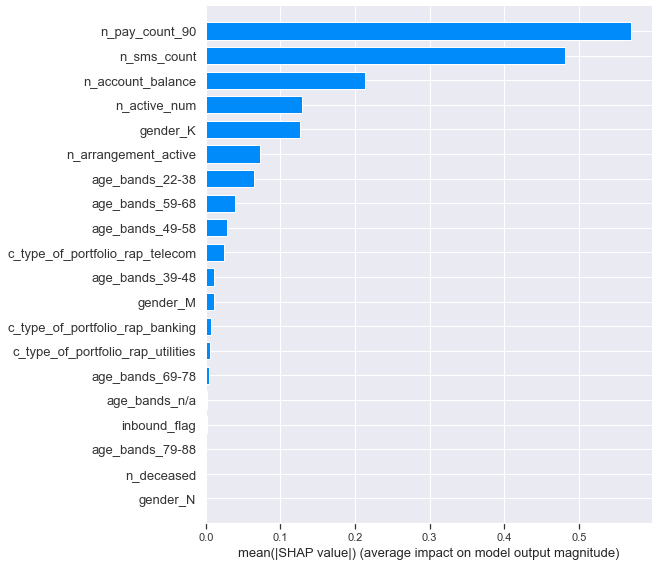

In [89]:
# computing feature importance
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

#### XGBoost Over Sampling

In [90]:
# fitting lr classifier to the training set
xgb_model_resampled = xgb_model.fit(x_resampled, y_resampled)

In [91]:
y_resampled.groupby(['Target']).size()

Target
0    1955
1    1955
dtype: int64

In [92]:
# predicting on test set
y_predicted_resampled_xgb = xgb_model_resampled.predict(x_test)

In [93]:
print("OVR training accuracy:", xgb_model_resampled.score(x_resampled, y_resampled))
print("OVR test accuracy    :", xgb_model_resampled.score(x_test, y_test))

OVR training accuracy: 0.908695652173913
OVR test accuracy    : 0.8530259365994236


In [94]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_predicted_resampled_xgb))
print(classification_report(y_test, y_predicted_resampled_xgb))

[[806  15]
 [138  82]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       821
           1       0.85      0.37      0.52       220

    accuracy                           0.85      1041
   macro avg       0.85      0.68      0.72      1041
weighted avg       0.85      0.85      0.83      1041



#### UnderSampling

In [95]:
under_sampler = RandomUnderSampler()

In [96]:
# applying resampling to the training set only
x_undersampled, y_undersampled = under_sampler.fit_resample(x_train, y_train)

In [97]:
y_undersampled.groupby(['Target']).size()

Target
0    474
1    474
dtype: int64

In [98]:
# fitting lr classifier to the training set
xgb_model_undersampled = xgb_model.fit(x_undersampled, y_undersampled)

In [99]:
y_predicted_undersampled = xgb_model_undersampled.predict(x_test)

In [100]:
print("OVR training accuracy:", xgb_model_undersampled.score(x_train, y_train))
print("OVR test accuracy    :", xgb_model_undersampled.score(x_test, y_test))

OVR training accuracy: 0.7748044462741869
OVR test accuracy    : 0.7348703170028819


In [101]:
print(confusion_matrix(y_test, y_predicted_undersampled))
print(classification_report(y_test, y_predicted_undersampled))

[[625 196]
 [ 80 140]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       821
           1       0.42      0.64      0.50       220

    accuracy                           0.73      1041
   macro avg       0.65      0.70      0.66      1041
weighted avg       0.79      0.73      0.75      1041



#### kFold cross-validation accross models

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

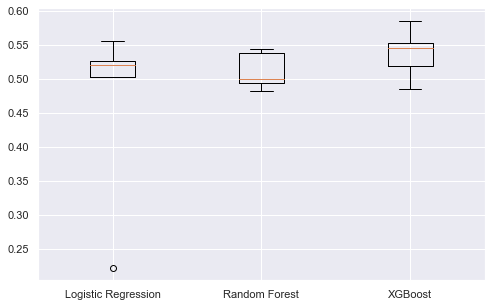

In [186]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "Random Forest": RandomForestClassifier(), "XGBoost": XGBClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=5, shuffle=True, random_state=2486)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, x_train, y_train, cv=kf, scoring='f1')
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Plea

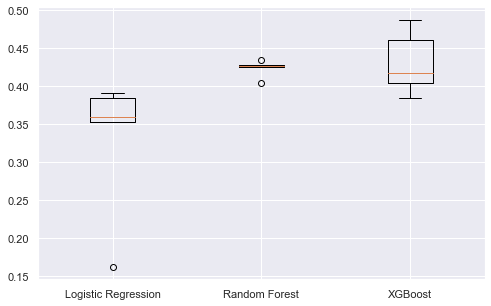

In [103]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "Random Forest": RandomForestClassifier(), "XGBoost": XGBClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=5, shuffle=True, random_state=2486)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, x_train, y_train, cv=kf, scoring='recall')
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

#### Hyperparameters tunning

In [104]:
# creating the parameter grid
param_grid = {
    'learning_rate': np.arange(.05, 1),
    'max_depth': np.arange(3,10, 1),
    'n_estimators': np.arange(50, 100, 150)
}

In [105]:
!pip install scikit-optimize

#### Bayes optimization

In [106]:
from skopt import BayesSearchCV, space, plots
#from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import SCORERS

In [107]:
xgb_BSearch = BayesSearchCV(xgb_model, param_grid, n_iter = 10, scoring='f1', cv = 5, 
                     verbose = 0)

In [108]:
xgb_BSearch = xgb_BSearch.fit(x_train, y_train)

In [109]:
print(xgb_BSearch.best_score_)
print(xgb_BSearch.best_params_)

0.5566584667932883
OrderedDict([('learning_rate', 0.05), ('max_depth', 3), ('n_estimators', 50)])


In [123]:
# predicting the labels of the test set: preds
y_predicted_xgb_BSearch = xgb_BSearch.predict(x_test)

#### precision

In [242]:
xgb_BSearch_precision = BayesSearchCV(xgb_model, param_grid, n_iter = 10, scoring='precision', cv = 5, 
                     verbose = 0)

In [243]:
xgb_BSearch_pre = xgb_BSearch_precision.fit(x_train, y_train)

In [244]:
print(xgb_BSearch_pre.best_score_)
print(xgb_BSearch_pre.best_params_)

0.9164479070980619
OrderedDict([('learning_rate', 0.05), ('max_depth', 4), ('n_estimators', 50)])


#### recall

In [111]:
xgb_BSearch_recall = BayesSearchCV(xgb_model, param_grid, n_iter = 10, scoring='recall', cv = 5, 
                     verbose = 0)

In [112]:
xgb_BSearch_recall = xgb_BSearch_precision.fit(x_train, y_train)

In [114]:
print(xgb_BSearch_recall.best_score_)
print(xgb_BSearch_recall.best_params_)

0.4071892497200448
OrderedDict([('learning_rate', 0.05), ('max_depth', 8), ('n_estimators', 50)])


#### Output

In [124]:
y_test

,Target
3088,1
3241,0
2156,1
2184,0
905,0
...,...
988,0
1759,0
2561,0
271,0


In [125]:
y_test_df = y_test.reset_index()
y_test_df

,index,Target
0,3088,1
1,3241,0
2,2156,1
3,2184,0
4,905,0
...,...,...
1036,988,0
1037,1759,0
1038,2561,0
1039,271,0


In [126]:
y_test['Target'].value_counts(normalize=True).sort_values()

1    0.211335
0    0.788665
Name: Target, dtype: float64

In [127]:
y_predicted_xgb_BSearch

array([0, 0, 1, ..., 0, 0, 0])

In [128]:
y_predicted_xgb_BSearch_df = pd.DataFrame(y_predicted_xgb_BSearch, columns = ['y_hat'])
print(y_predicted_xgb_BSearch_df)

      y_hat
0         0
1         0
2         1
3         0
4         0
...     ...
1036      0
1037      0
1038      0
1039      0
1040      0

[1041 rows x 1 columns]


In [129]:
y_predicted_xgb_BSearch_df['y_hat'].value_counts(normalize=True).sort_values()

1    0.079731
0    0.920269
Name: y_hat, dtype: float64

In [130]:
y_predict_proba_xgb = xgb_BSearch.predict_proba(x_test)
y_predict_proba_xgb 

array([[0.6739135 , 0.3260865 ],
       [0.81584245, 0.18415754],
       [0.20123297, 0.79876703],
       ...,
       [0.9209436 , 0.07905637],
       [0.8742242 , 0.12577578],
       [0.855244  , 0.14475602]], dtype=float32)

In [131]:
y_predicted_probabilites = y_predict_proba_xgb[:, -1]
y_predicted_probabilites

array([0.3260865 , 0.18415754, 0.79876703, ..., 0.07905637, 0.12577578,
       0.14475602], dtype=float32)

In [132]:
y_predicted_probabilites.shape

(1041,)

In [133]:
y_predicted_probabilites_df=pd.DataFrame(y_predicted_probabilites)
y_predicted_probabilites_df

,0
0,0.326086
1,0.184158
2,0.798767
3,0.262915
4,0.124457
...,...
1036,0.075042
1037,0.120309
1038,0.079056
1039,0.125776


In [134]:
y_predicted_probabilites_df.rename(columns = {0:'Score_1'}, inplace = True)

In [135]:
y_predicted_probabilites_df

,Score_1
0,0.326086
1,0.184158
2,0.798767
3,0.262915
4,0.124457
...,...
1036,0.075042
1037,0.120309
1038,0.079056
1039,0.125776


In [136]:
y_test_df

,index,Target
0,3088,1
1,3241,0
2,2156,1
3,2184,0
4,905,0
...,...,...
1036,988,0
1037,1759,0
1038,2561,0
1039,271,0


In [137]:
#decile_df = y_predicted_probabilites_df.join(y_test)
tbl_for_summary = pd.concat([y_test_df, y_predicted_probabilites_df,y_predicted_xgb_BSearch_df], axis=1)
tbl_for_summary

,index,Target,Score_1,y_hat
0,3088,1,0.326086,0
1,3241,0,0.184158,0
2,2156,1,0.798767,1
3,2184,0,0.262915,0
4,905,0,0.124457,0
...,...,...,...,...
1036,988,0,0.075042,0
1037,1759,0,0.120309,0
1038,2561,0,0.079056,0
1039,271,0,0.125776,0


In [138]:
tbl_for_summary['Score_0'] = 1 - tbl_for_summary['Score_1']

In [139]:
tbl_for_summary

,index,Target,Score_1,y_hat,Score_0
0,3088,1,0.326086,0,0.673913
1,3241,0,0.184158,0,0.815842
2,2156,1,0.798767,1,0.201233
3,2184,0,0.262915,0,0.737085
4,905,0,0.124457,0,0.875543
...,...,...,...,...,...
1036,988,0,0.075042,0,0.924958
1037,1759,0,0.120309,0,0.879691
1038,2561,0,0.079056,0,0.920944
1039,271,0,0.125776,0,0.874224


In [140]:
tbl_for_summary['decile'] = pd.qcut(tbl_for_summary['Score_1'].rank(method='first', ascending=False), 10, labels = list(range(1,11)), duplicates='drop')

In [141]:
tbl_for_summary

,index,Target,Score_1,y_hat,Score_0,decile
0,3088,1,0.326086,0,0.673913,1
1,3241,0,0.184158,0,0.815842,4
2,2156,1,0.798767,1,0.201233,1
3,2184,0,0.262915,0,0.737085,2
4,905,0,0.124457,0,0.875543,7
...,...,...,...,...,...,...
1036,988,0,0.075042,0,0.924958,10
1037,1759,0,0.120309,0,0.879691,8
1038,2561,0,0.079056,0,0.920944,10
1039,271,0,0.125776,0,0.874224,7


In [142]:
summarized_tbl = tbl_for_summary.groupby("decile").agg(count = ("Target","count"), actual = ("Target","sum"), max = ("Score_1","max"), min = ("Score_1","min"))

In [143]:
summarized_tbl['Cumulative actual'] = summarized_tbl['actual'].cumsum()

In [144]:
summarized_tbl['Cumulative Abs values'] = summarized_tbl['actual'].cumsum()/ summarized_tbl['actual'].sum()

In [145]:
summarized_tbl['Cumulative %'] = summarized_tbl['Cumulative Abs values'].apply(lambda x: f'{x:.2%}')

In [146]:
summarized_tbl.reset_index(inplace=True)
summarized_tbl

,decile,count,actual,max,min,Cumulative actual,Cumulative Abs values,Cumulative %
0,1,105,93,0.952188,0.326086,93,0.422727,42.27%
1,2,104,26,0.322962,0.250868,119,0.540909,54.09%
2,3,104,24,0.250868,0.221361,143,0.650000,65.00%
3,4,104,9,0.221361,0.144756,152,0.690909,69.09%
4,5,104,20,0.144756,0.135833,172,0.781818,78.18%
5,6,104,21,0.135833,0.128467,193,0.877273,87.73%
6,7,104,12,0.128467,0.120309,205,0.931818,93.18%
7,8,104,7,0.120309,0.110068,212,0.963636,96.36%
8,9,104,4,0.110068,0.096036,216,0.981818,98.18%
9,10,104,4,0.096030,0.075042,220,1.000000,100.00%


In [147]:
plot_cum = list(summarized_tbl['Cumulative Abs values'])
plot_cum

[0.42272727272727273,
 0.5409090909090909,
 0.65,
 0.6909090909090909,
 0.7818181818181819,
 0.8772727272727273,
 0.9318181818181818,
 0.9636363636363636,
 0.9818181818181818,
 1.0]

In [148]:
count = list(summarized_tbl['count'])
count

[105, 104, 104, 104, 104, 104, 104, 104, 104, 104]

#### MODEL EVALUATION

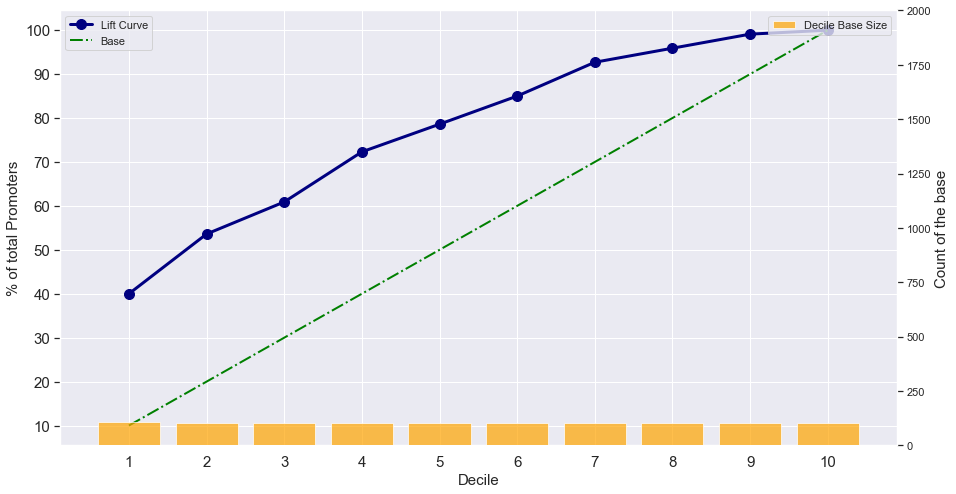

In [235]:
decile = [1,2,3,4,5,6,7,8,9,10]

fig, ax = plt.subplots(figsize=(15,8))

plt.plot(decile, [round(x*100,1) for x in plot_cum], marker='o', c='Navy', markersize=10, linewidth=3, label="Lift Curve", zorder=10)

plt.plot([1, 10], [10,100 ], color='green', linestyle='dashdot', linewidth=2, label="Base", zorder=10)
plt.xlabel('Decile', fontsize=15)
plt.legend(loc='best')
plt.ylabel('% of total Promoters', fontsize=15)
plt.xticks(np.arange(1, 10+1, 1), fontsize=15)
plt.yticks(np.arange(10, 100+1, 10), fontsize=15)

ax2 = ax.twinx()

ax2.bar(decile, count, color='orange', label='Decile Base Size', zorder=11, alpha=0.7)
#ax2.bar(deciles + width, base, width, color='blue', label='Decile base size', zorder=11, alpha=0.7)
ax2.legend(loc=1)

ax2.set_ylim(0, 2000)
ax2.set_ylabel('Count of the base', fontsize=15)
plt.grid()
plt.show()

In [149]:
ct = pd.crosstab(tbl_for_summary['Target'], tbl_for_summary['y_hat'], margins=True, margins_name='Total')
ct

y_hat,0,1,Total
Target,,,
0,819,2,821
1,139,81,220
Total,958,83,1041


In [150]:
x_test

,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,age_bands_22-38,age_bands_39-48,age_bands_49-58,age_bands_59-68,age_bands_69-78,age_bands_79-88,age_bands_n/a,c_type_of_portfolio_rap_banking,c_type_of_portfolio_rap_telecom,c_type_of_portfolio_rap_utilities,gender_K,gender_M,gender_N
3088,700.44,1,0,7,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3241,1180.89,2,0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2156,25222.40,3,1,3,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2184,7773.43,2,0,4,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
905,5071.97,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,22674.29,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1759,9087.98,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2561,24578.49,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
271,7051.39,2,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [151]:
calc2 = tbl_for_summary.copy()
calc2

,index,Target,Score_1,y_hat,Score_0,decile
0,3088,1,0.326086,0,0.673913,1
1,3241,0,0.184158,0,0.815842,4
2,2156,1,0.798767,1,0.201233,1
3,2184,0,0.262915,0,0.737085,2
4,905,0,0.124457,0,0.875543,7
...,...,...,...,...,...,...
1036,988,0,0.075042,0,0.924958,10
1037,1759,0,0.120309,0,0.879691,8
1038,2561,0,0.079056,0,0.920944,10
1039,271,0,0.125776,0,0.874224,7


In [152]:
cal3 = calc2.set_index('index')
cal3

,Target,Score_1,y_hat,Score_0,decile
index,,,,,
3088,1,0.326086,0,0.673913,1
3241,0,0.184158,0,0.815842,4
2156,1,0.798767,1,0.201233,1
2184,0,0.262915,0,0.737085,2
905,0,0.124457,0,0.875543,7
...,...,...,...,...,...
988,0,0.075042,0,0.924958,10
1759,0,0.120309,0,0.879691,8
2561,0,0.079056,0,0.920944,10


In [153]:
x_text_data = x_test.copy()
x_text_data

,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,age_bands_22-38,age_bands_39-48,age_bands_49-58,age_bands_59-68,age_bands_69-78,age_bands_79-88,age_bands_n/a,c_type_of_portfolio_rap_banking,c_type_of_portfolio_rap_telecom,c_type_of_portfolio_rap_utilities,gender_K,gender_M,gender_N
3088,700.44,1,0,7,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3241,1180.89,2,0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2156,25222.40,3,1,3,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2184,7773.43,2,0,4,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
905,5071.97,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,22674.29,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1759,9087.98,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2561,24578.49,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
271,7051.39,2,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [154]:
final_calc= pd.concat([x_text_data, cal3], axis=1)
final_calc

,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,age_bands_22-38,age_bands_39-48,age_bands_49-58,...,c_type_of_portfolio_rap_telecom,c_type_of_portfolio_rap_utilities,gender_K,gender_M,gender_N,Target,Score_1,y_hat,Score_0,decile
3088,700.44,1,0,7,0,0,0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1,0.326086,0,0.673913,1
3241,1180.89,2,0,1,0,0,1,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0,0.184158,0,0.815842,4
2156,25222.40,3,1,3,0,0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0.798767,1,0.201233,1
2184,7773.43,2,0,4,0,0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0.262915,0,0.737085,2
905,5071.97,1,0,0,0,0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0.124457,0,0.875543,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,22674.29,1,0,0,0,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0,0.075042,0,0.924958,10
1759,9087.98,1,0,0,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0.120309,0,0.879691,8
2561,24578.49,1,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0.079056,0,0.920944,10
271,7051.39,2,0,0,0,1,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0,0.125776,0,0.874224,7


In [157]:
fn = final_calc[(final_calc['Target'] == 1)  & (final_calc['y_hat'] == 0)]
fn

,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,age_bands_22-38,age_bands_39-48,age_bands_49-58,...,c_type_of_portfolio_rap_telecom,c_type_of_portfolio_rap_utilities,gender_K,gender_M,gender_N,Target,Score_1,y_hat,Score_0,decile
3088,700.44,1,0,7,0,0,0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1,0.326086,0,0.673913,1
1496,37774.97,2,0,2,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0.231761,0,0.768239,3
2627,1188.85,1,0,6,0,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1,0.229912,0,0.770088,3
418,721.34,2,0,0,0,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1,0.128467,0,0.871533,6
2488,5945.30,1,0,5,0,0,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1,0.250408,0,0.749592,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,66155.29,1,0,6,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0.230107,0,0.769893,3
1489,1132.85,3,0,4,0,0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0.270009,0,0.729991,2
1373,744.02,3,0,5,0,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1,0.244806,0,0.755194,3
3451,1196.86,1,0,7,0,0,0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1,0.326086,0,0.673913,1


In [159]:
#fn['Target_Amount'].sum()

In [160]:
fp = final_calc[(final_calc['Target'] == 0)  & (final_calc['y_hat'] == 1)]
fp

,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,age_bands_22-38,age_bands_39-48,age_bands_49-58,...,c_type_of_portfolio_rap_telecom,c_type_of_portfolio_rap_utilities,gender_K,gender_M,gender_N,Target,Score_1,y_hat,Score_0,decile
481,6999.43,1,2,1,0,0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0.948454,1,0.051546,1
188,12376.81,1,1,2,0,0,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0,0.793799,1,0.206201,1


In [161]:
tp = final_calc[(final_calc['Target'] == 1)  & (final_calc['y_hat'] == 1)]
tp

,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,age_bands_22-38,age_bands_39-48,age_bands_49-58,...,c_type_of_portfolio_rap_telecom,c_type_of_portfolio_rap_utilities,gender_K,gender_M,gender_N,Target,Score_1,y_hat,Score_0,decile
2156,25222.40,3,1,3,0,0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0.798767,1,0.201233,1
898,12154.52,2,0,4,0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0.654684,1,0.345316,1
2130,5518.80,1,1,11,0,0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0.774471,1,0.225529,1
1555,650.50,3,0,7,0,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0.717053,1,0.282947,1
1620,14592.13,1,2,2,0,1,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0.950006,1,0.049994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,28450.65,1,1,0,0,1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0.806453,1,0.193547,1
1649,651.81,1,2,10,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0.948680,1,0.051320,1
1505,1528.47,2,2,0,0,0,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0.943175,1,0.056825,1
1586,5643.94,1,2,5,0,1,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0.950006,1,0.049994,1


In [164]:
decile_1 = final_calc[(final_calc['decile'] == 1)]

In [166]:
decile_1.describe()

,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,age_bands_22-38,age_bands_39-48,age_bands_49-58,...,c_type_of_portfolio_rap_banking,c_type_of_portfolio_rap_telecom,c_type_of_portfolio_rap_utilities,gender_K,gender_M,gender_N,Target,Score_1,y_hat,Score_0
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,12983.977714,2.047619,1.352381,4.085714,0.009524,0.485714,0.085714,0.200000,0.247619,0.285714,...,0.800000,0.152381,0.047619,0.657143,0.314286,0.028571,0.885714,0.751983,0.790476,0.248017
std,19570.423186,1.723039,1.082918,4.370166,0.097590,0.502193,0.281284,0.401918,0.433699,0.453921,...,0.401918,0.361113,0.213980,0.476941,0.466457,0.167398,0.319684,0.239351,0.408921,0.239352
min,315.790000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.326086,0.000000,0.047812
25%,1356.370000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.649226,1.000000,0.049994
50%,4772.640000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.799022,1.000000,0.200978
75%,18510.970000,2.000000,2.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.950006,1.000000,0.350774
max,125852.280000,14.000000,3.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.952188,1.000000,0.673913
